<a href="https://colab.research.google.com/github/williamtatecarr/DS-1002/blob/main/Assignments/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"
df = pd.read_csv(url,delimiter=';')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
df.shape
#originally 741, 11

## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:
#dropping the columns and saving the dataframe
df.drop(['timeOpen','timeClose','timeHigh','timeLow','marketCap'],axis=1,inplace = True)
#only works the first time, else will display error

In [167]:
#dropping duplicated rows:
df.duplicated().sum()
df=df.drop_duplicates()

In [179]:
#checking for empty values
df.isna().sum()
#none found

In [ ]:
#already sorted chronologically but descending, so I can create new df flipping:
sdf=df.sort_values(by='timestamp', ascending=True).reset_index(drop=True)

Now display the first 10 rows of the cleaned dataset.

In [234]:
sdf.iloc[0:10]

,open,high,low,close,volume,timestamp,close_change,rate_of_change
0,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03T23:59:59.999Z,NaN,NaN
1,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04T23:59:59.999Z,0.590111,NaN
2,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05T23:59:59.999Z,1.150608,0.949817
3,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06T23:59:59.999Z,0.726110,-0.368934
4,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07T23:59:59.999Z,0.171334,-0.764039
5,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08T23:59:59.999Z,-0.181143,-2.057251
6,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09T23:59:59.999Z,0.189522,-2.046260
7,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10T23:59:59.999Z,-0.261701,-2.380847
8,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11T23:59:59.999Z,-0.697813,1.666448
9,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12T23:59:59.999Z,-0.229863,-0.670594


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [186]:
#adding "close_change" column that calculates the difference between daily closing prices for FTX from the row above, which is now previous calendar day after I flipped df into sdf
sdf['close_change'] = sdf['close'].diff()
#there will be a NaN in row 0 because it has no previous

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [187]:
#identifying top 10 days of + growth, .head() operator shows the 10 best
top10pgFTX = sdf.sort_values(["close_change"], ascending=False).head(10)

In [236]:
#displaying table with just rate of change and dates
top10pgFTX[['timestamp', 'close_change']]

,timestamp,close_change
241,2021-09-01T23:59:59.999Z,16.677156
246,2021-09-06T23:59:59.999Z,9.800320
47,2021-02-19T23:59:59.999Z,8.335900
141,2021-05-24T23:59:59.999Z,6.333923
65,2021-03-09T23:59:59.999Z,5.529699
218,2021-08-09T23:59:59.999Z,5.325192
248,2021-09-08T23:59:59.999Z,5.239728
113,2021-04-26T23:59:59.999Z,4.504385
122,2021-05-05T23:59:59.999Z,4.488174
420,2022-02-28T23:59:59.999Z,4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [189]:
#adding a column that calculates percentage rate of change from the row above and previous calendar day
sdf['rate_of_change'] = sdf['close_change'].pct_change()
#should naturally be NaN in row 0 and row 1 because it has no previous

In [ ]:
#getting ready for next task
sdf.sort_values(by='rate_of_change', ascending=False)

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [191]:
#5 greatest positive rate change:
top5prc = sdf.sort_values(by='rate_of_change', ascending=False).head(5)
#5 greatest negative rate change
top5nrc = sdf.sort_values(by='rate_of_change', ascending=True).head(5)

In [192]:
#using .concat() operator to conjoin frames to only display 1 table per instructions
top5c = pd.concat([top5prc, top5nrc])
#displaying in the table both rate of change and dates, sorted already
top5c[['timestamp', 'rate_of_change']].sort_values(by='rate_of_change', ascending=False)

,timestamp,rate_of_change
359,2021-12-28T23:59:59.999Z,612.326740
673,2022-11-08T23:59:59.999Z,129.835551
494,2022-05-13T23:59:59.999Z,117.908853
423,2022-03-03T23:59:59.999Z,92.537644
220,2021-08-11T23:59:59.999Z,65.569141
551,2022-07-09T23:59:59.999Z,-50.514692
596,2022-08-23T23:59:59.999Z,-84.342694
621,2022-09-17T23:59:59.999Z,-111.945189
540,2022-06-28T23:59:59.999Z,-164.238246
288,2021-10-18T23:59:59.999Z,-262.744729


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.


plt.xticks( [sdf['timestamp'].iloc[0],sdf['timestamp'].iloc[727]])
tick_labels = ['01-03-2021', '12-21-2022']

([<matplotlib.axis.XTick at 0x7df4d7a24af0>,
 [Text(1.0, 0, '01-03-2021'),
  Text(249.0, 0, '09-09-2021'),
  Text(726.0, 0, '12-31-2022')])

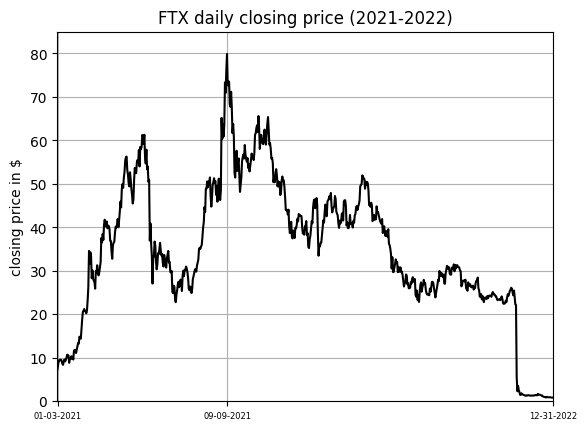

In [237]:
#using matplotlib.pyplot as plt to create line plot for daily closing price
plt.plot(sdf['timestamp'], sdf['close'], color='black')
#improving plot with visual opperators
plt.title('FTX daily closing price (2021-2022)')
plt.ylabel('closing price in $')
plt.grid(True)
plt.xlim(0,726)
plt.ylim(0,85)
#adding tickers at the beginning and end, but also notable high using matplot operators I reasearched
tickp = [sdf['timestamp'].iloc[1], sdf['timestamp'].iloc[249], sdf['timestamp'].iloc[726]]
tickn = ['01-03-2021', '09-09-2021', '12-31-2022']
plt.xticks(tickp, tickn, fontsize=6)

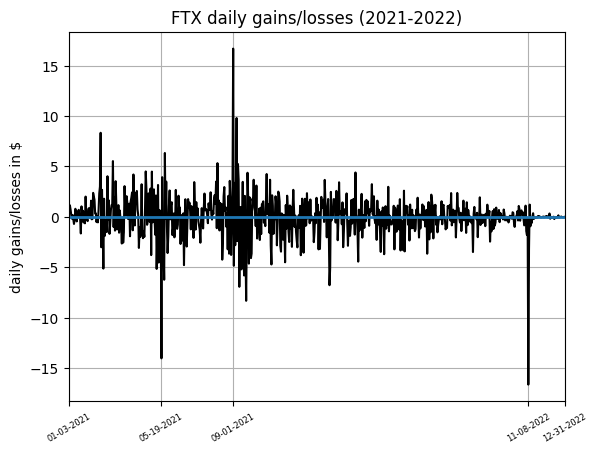

In [247]:
#using matplotlib.pyplot as plt to create line plot for daily gains/loses
plt.plot(sdf['timestamp'], sdf['close_change'], color='black')
# againg improving plot with use visual operators I researched
plt.title('FTX daily gains/losses (2021-2022)')
plt.ylabel('daily gains/losses in $')
plt.grid(True)
plt.xlim(0,726)
#same ticker operators highlighting notable points and their corresponding dates
tickp2 = [sdf['timestamp'].iloc[1], sdf['timestamp'].iloc[136],sdf['timestamp'].iloc[241],sdf['timestamp'].iloc[673], sdf['timestamp'].iloc[726]]
tickn2 = ['01-03-2021', '05-19-2021', '09-01-2021', '11-08-2022', '12-31-2022']
#rotating tickers because they were overlapping
plt.xticks(rotation=30)
plt.xticks(tickp2, tickn2, fontsize=6)
#using this operator to highlight axis at 0 for clarity
plt.axhline(y=0, linewidth=2)

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

([<matplotlib.axis.XTick at 0x7df4d5f634c0>,
 [Text(1.0, 0, '01-03-2021'), Text(726.0, 0, '12-31-2022')])

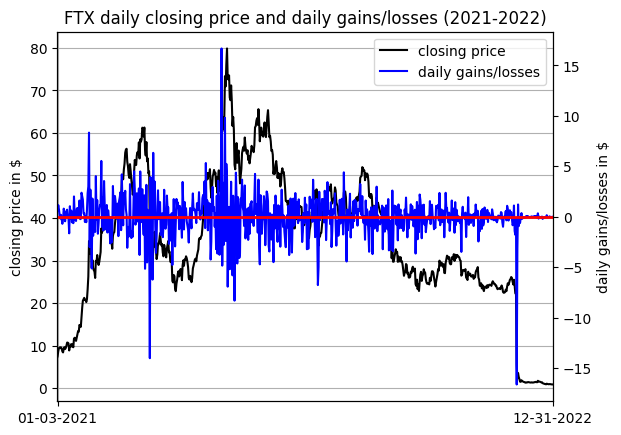

In [253]:
#learned that you don't have to write chunk combining sets in the begging, you can plot them separately and create axes using .subplots() in matplotlib
#so now start with our first, the close price plot
x2, x = plt.subplots()
#creating first with the 'close' set, label is for future legend
x.plot(sdf['timestamp'], sdf['close'], color='black', label='closing price')
#same operators as before to improve visualization
x.set_ylabel('closing price in $')
x.grid(True)
x.set_xticks([])
x.set_xlim(0, 726)
#now using .twin() creating to create second axes and following the same steps, but the grid and zoom/range operators will carry over from chunk above since it is all on the same plot
x2 = x.twinx()
x2.plot(sdf['timestamp'], sdf['close_change'], color='blue', label='daily gains/losses')
x2.set_ylabel('daily gains/losses in $')
x2.set_xticks([])
#doing same as 'close_change' plot to make axis at y=0 pop
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)
#now adding legend and title using legend operators researhed
lines, labels = x.get_legend_handles_labels()
lines2, labels2 = x2.get_legend_handles_labels()
plt.legend(la + lines2, labels + labels2)
x.set_title('FTX daily closing price and daily gains/losses (2021-2022)')
# and last adding x axis ticker for our date range so our x axis is clearly time
tickp3 = [sdf['timestamp'].iloc[1], sdf['timestamp'].iloc[726]]
tickn3 = ['01-03-2021', '12-31-2022']
plt.xticks(tickp3, tickn3, fontsize=8)